In [1]:
# general modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import os, sys, time, glob
import json
import warnings

In [2]:
# pytorch
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

In [3]:
# extras
from IPython.display import clear_output
from time import time
from time import sleep
import corner
from os.path import exists

In [4]:
# importing functions
from embedding import SimilarityEmbedding
from data_processing import Paper_data

In [5]:
# checking gpu status, ensures tensors are stored on the same device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

Using cuda


# Load in Data

In [6]:
# load in tensors

data_shifted_paper1 = torch.load('/nobackup/users/mmdesai/updated_tensors/data_shifted_paper4.pt')
data_unshifted_paper1 = torch.load('/nobackup/users/mmdesai/updated_tensors/data_unshifted_paper4.pt')
param_shifted_paper1 = torch.load('/nobackup/users/mmdesai/updated_tensors/param_shifted_paper4.pt')
param_unshifted_paper1 = torch.load('/nobackup/users/mmdesai/updated_tensors/param_unshifted_paper4.pt')

data_shifted_paper2 = torch.load('/nobackup/users/mmdesai/updated_tensors/data_shifted_paper5.pt')
data_unshifted_paper2 = torch.load('/nobackup/users/mmdesai/updated_tensors/data_unshifted_paper5.pt')
param_shifted_paper2 = torch.load('/nobackup/users/mmdesai/updated_tensors/param_shifted_paper5.pt')
param_unshifted_paper2 = torch.load('/nobackup/users/mmdesai/updated_tensors/param_unshifted_paper5.pt')

data_shifted_paper3 = torch.load('/nobackup/users/mmdesai/updated_tensors/data_shifted_paper6.pt')
data_unshifted_paper3 = torch.load('/nobackup/users/mmdesai/updated_tensors/data_unshifted_paper6.pt')
param_shifted_paper3 = torch.load('/nobackup/users/mmdesai/updated_tensors/param_shifted_paper6.pt')
param_unshifted_paper3 = torch.load('/nobackup/users/mmdesai/updated_tensors/param_unshifted_paper6.pt')

In [7]:
data_shifted_paper = torch.stack(data_shifted_paper1 + data_shifted_paper2 + data_shifted_paper3)
data_unshifted_paper = torch.stack(data_unshifted_paper1 + data_unshifted_paper2 + data_unshifted_paper3)
param_shifted_paper = torch.stack(param_shifted_paper1 + param_shifted_paper2 + param_shifted_paper3)
param_unshifted_paper = torch.stack(param_unshifted_paper1 + param_unshifted_paper2 + param_unshifted_paper3)

In [8]:
# define the dataset

num_batches_paper_sample = len(data_shifted_paper)
dataset_paper = Paper_data(data_shifted_paper, data_unshifted_paper, param_shifted_paper, param_unshifted_paper, num_batches_paper_sample)

In [9]:
# split dataset into training, testing, and validation

num_batches_paper_sample = len(data_shifted_paper)

train_set_size_paper = int(0.8 * num_batches_paper_sample)    
val_set_size_paper = int(0.1 * num_batches_paper_sample)     
test_set_size_paper = num_batches_paper_sample - train_set_size_paper - val_set_size_paper

train_data_paper, val_data_paper, test_data_paper = torch.utils.data.random_split(
    dataset_paper, [train_set_size_paper, val_set_size_paper, test_set_size_paper])

In [10]:
# load and shuffle the data

train_data_loader_paper = DataLoader(train_data_paper, batch_size=25, shuffle=True)
val_data_loader_paper = DataLoader(val_data_paper, batch_size=25, shuffle=True)
test_data_loader_paper = DataLoader(test_data_paper, batch_size=1, shuffle=False)

# Set Similarity Embedding

In [11]:
# model
num_dim = 7
similarity_embedding = SimilarityEmbedding(num_dim=7, num_hidden_layers_f=1, num_hidden_layers_h=1, num_blocks=4, kernel_size=5, num_dim_final=2).to(device)

# load in model weights
SAVEPATH = '/nobackup/users/mmdesai/updated_weights/similarity-embedding-weights.pth'
similarity_embedding.load_state_dict(torch.load(SAVEPATH, map_location=device))
similarity_embedding.eval()

SimilarityEmbedding(
  (layer_norm): LayerNorm((3, 121), eps=1e-05, elementwise_affine=True)
  (layers_f): ResNet(
    (conv1): Conv1d(3, 64, kernel_size=(7,), stride=(2,), padding=(3,), bias=False)
    (bn1): GroupNorm()
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (residual_layers): ModuleList(
      (0): Sequential(
        (0): BasicBlock(
          (conv1): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
          (bn1): GroupNorm()
          (relu): ReLU(inplace=True)
          (conv2): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
          (bn2): GroupNorm()
        )
        (1): BasicBlock(
          (conv1): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
          (bn1): GroupNorm()
          (relu): ReLU(inplace=True)
          (conv2): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
          (bn2

# Check the Embedding

In [12]:
similarity_embedding.train(False)
data_loader = test_data_loader_paper

similarity_outputs_1 = []

for idx, (_, shift_test, data_test, data_test_orig) in enumerate(data_loader):
    _ = _.reshape((-1,)+_.shape[2:])
    data_test = data_test.reshape((-1,)+data_test.shape[2:])
    data_test_orig = data_test_orig.reshape((-1,)+data_test_orig.shape[2:])
    shift_test = shift_test.reshape((-1,)+shift_test.shape[2:])
    if not ((shift_test[0][0][0] < -1) and (shift_test[0][0][0] > -1.25)):
        continue
    if not ((shift_test[0][0][1] < -0.5) and (shift_test[0][0][1] > -0.75)):
        continue
    if not ((shift_test[0][0][2] < -3) and (shift_test[0][0][2] > -4.5)):
        continue
    with torch.no_grad():
        _, similarity_output = similarity_embedding(data_test)
    similarity_outputs_1.append(similarity_output)

similarity_outputs_2 = []

for idx, (_, shift_test, data_test, data_test_orig) in enumerate(data_loader):
    _ = _.reshape((-1,)+_.shape[2:])
    data_test = data_test.reshape((-1,)+data_test.shape[2:])
    data_test_orig = data_test_orig.reshape((-1,)+data_test_orig.shape[2:])
    shift_test = shift_test.reshape((-1,)+shift_test.shape[2:])
    if not ((shift_test[0][0][0] < -1.25) and (shift_test[0][0][0] > -1.5)):
        continue
    if not ((shift_test[0][0][1] < -0.75) and (shift_test[0][0][1] > -1)):
        continue
    if not ((shift_test[0][0][2] < -4.5) and (shift_test[0][0][2] > -6)):
        continue
    with torch.no_grad():
        _, similarity_output = similarity_embedding(data_test)
    similarity_outputs_2.append(similarity_output)

similarity_outputs_3 = []

for idx, (_, shift_test, data_test, data_test_orig) in enumerate(data_loader):
    _ = _.reshape((-1,)+_.shape[2:])
    data_test = data_test.reshape((-1,)+data_test.shape[2:])
    data_test_orig = data_test_orig.reshape((-1,)+data_test_orig.shape[2:])
    shift_test = shift_test.reshape((-1,)+shift_test.shape[2:])
    if not ((shift_test[0][0][0] < -1.5) and (shift_test[0][0][0] > -1.75)):
        continue
    if not ((shift_test[0][0][1] < -1) and (shift_test[0][0][1] > -1.25)):
        continue
    if not ((shift_test[0][0][2] < -6) and (shift_test[0][0][2] > -7.5)):
        continue
    with torch.no_grad():
        _, similarity_output = similarity_embedding(data_test)
    similarity_outputs_3.append(similarity_output)

similarity_outputs_4 = []

for idx, (_, shift_test, data_test, data_test_orig) in enumerate(data_loader):
    _ = _.reshape((-1,)+_.shape[2:])
    data_test = data_test.reshape((-1,)+data_test.shape[2:])
    data_test_orig = data_test_orig.reshape((-1,)+data_test_orig.shape[2:])
    shift_test = shift_test.reshape((-1,)+shift_test.shape[2:])
    if not ((shift_test[0][0][0] < -1.75) and (shift_test[0][0][0] > -2.5)):
        continue
    if not ((shift_test[0][0][1] < -1.25) and (shift_test[0][0][1] > -1.55)):
        continue
    if not ((shift_test[0][0][2] < -7.5) and (shift_test[0][0][2] > -9)):
        continue
    with torch.no_grad():
        _, similarity_output = similarity_embedding(data_test)
    similarity_outputs_4.append(similarity_output)

In [13]:
similarity_outputs_1 = torch.stack(similarity_outputs_1)
similarity_outputs_2 = torch.stack(similarity_outputs_2)
similarity_outputs_3 = torch.stack(similarity_outputs_3)
similarity_outputs_4 = torch.stack(similarity_outputs_4)

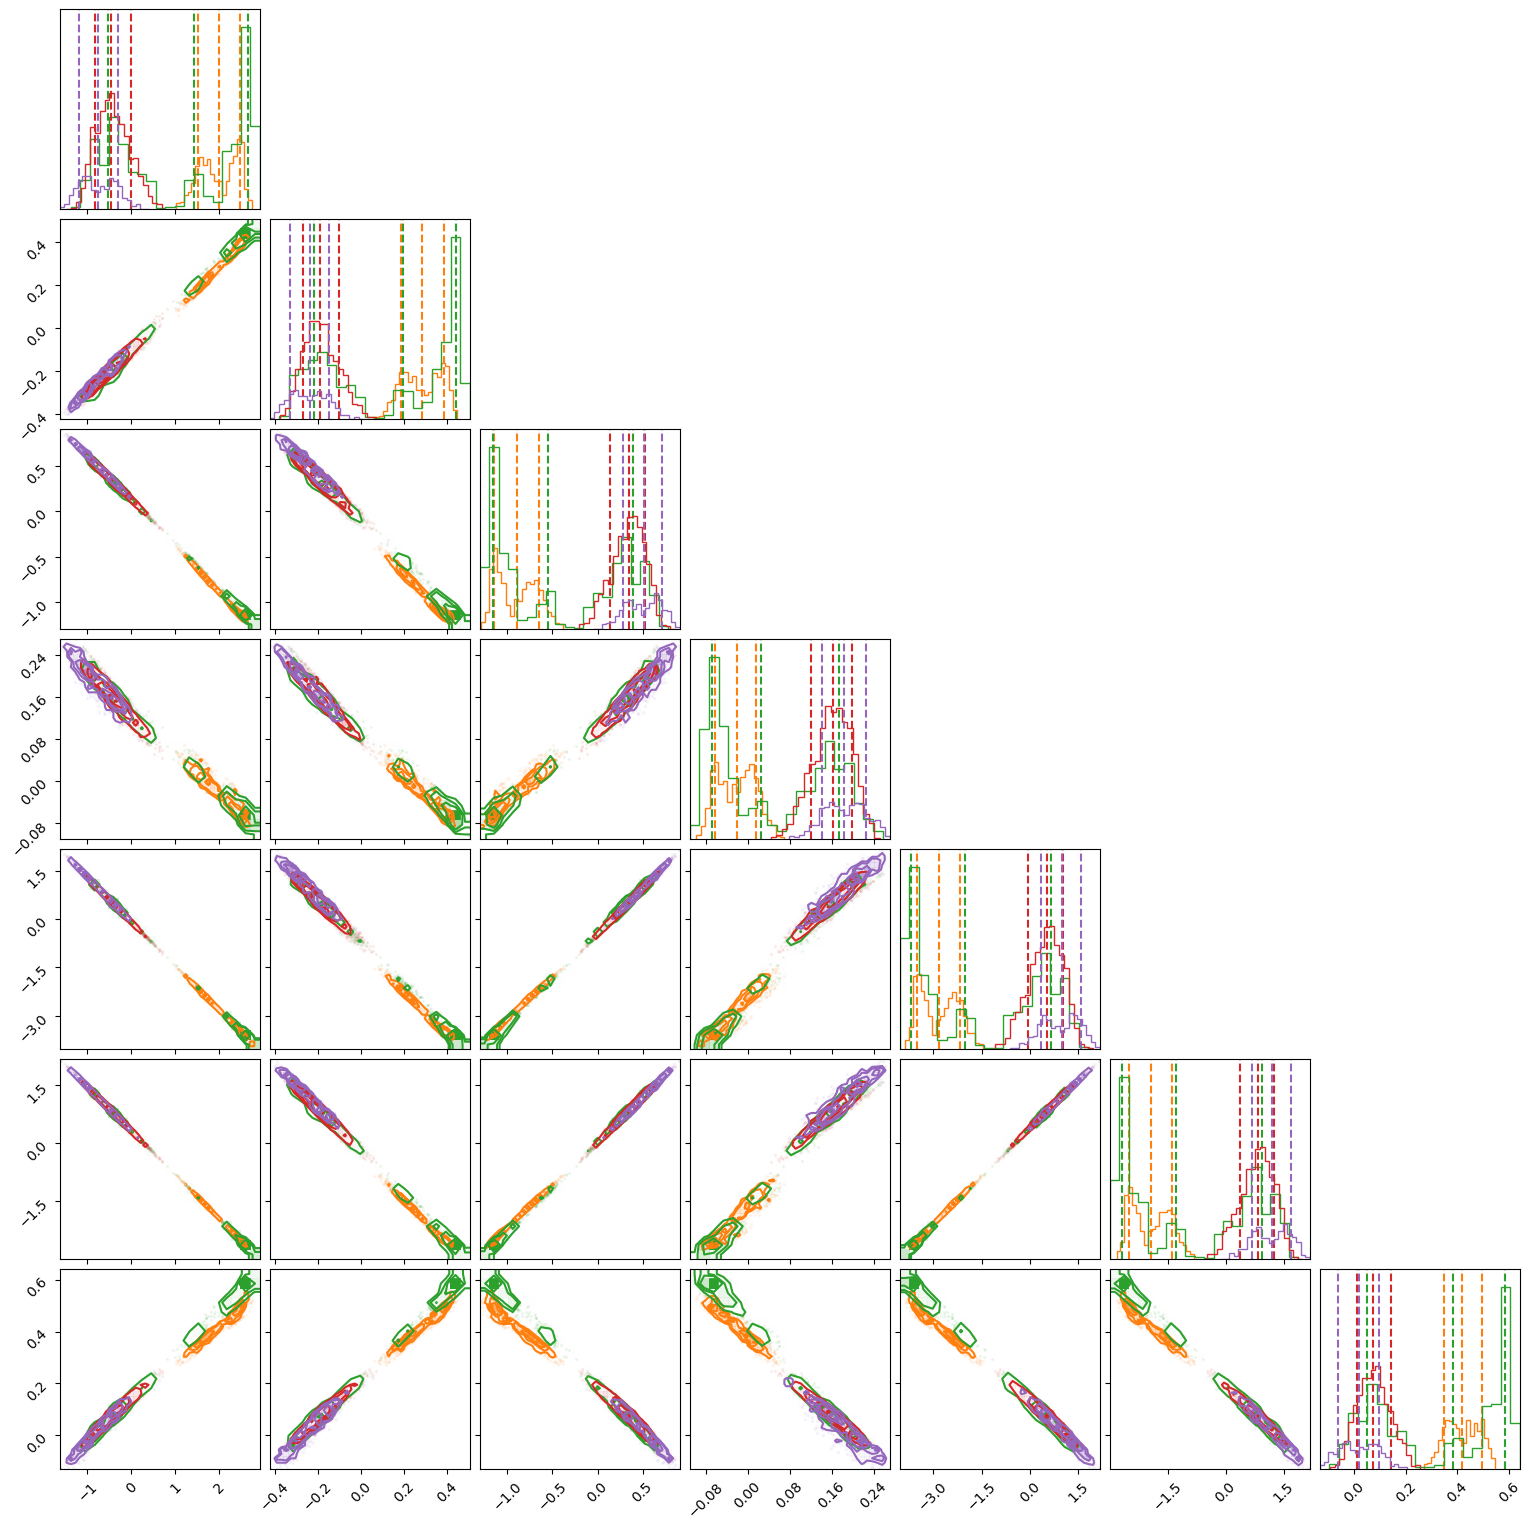

In [14]:
figure = corner.corner(
    similarity_outputs_1.cpu().numpy().reshape((similarity_outputs_1.shape[0]*similarity_outputs_1.shape[1], num_dim)),
    quantiles=[0.16, 0.5, 0.84], color="C1"
)

figure = corner.corner(
    similarity_outputs_2.cpu().numpy().reshape((similarity_outputs_2.shape[0]*similarity_outputs_2.shape[1], num_dim)),
    quantiles=[0.16, 0.5, 0.84], fig=figure, color="C2"
)

figure = corner.corner(
    similarity_outputs_3.cpu().numpy().reshape((similarity_outputs_3.shape[0]*similarity_outputs_3.shape[1], num_dim)),
    quantiles=[0.16, 0.5, 0.84], fig=figure, color="C3"
)

figure = corner.corner(
    similarity_outputs_4.cpu().numpy().reshape((similarity_outputs_4.shape[0]*similarity_outputs_4.shape[1], num_dim)),
    quantiles=[0.16, 0.5, 0.84], fig=figure, color="C4"
)